### Lead Score Case Study


### Step 1: Importing and Merging Data

In [720]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [721]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [722]:
# Importing all datasets
leadscore_data = pd.read_csv("Leads.csv")


### Step 2: Inspecting the Dataframe

In [723]:
# Let's see the head of our master dataset
leadscore_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [724]:
# Let's check the dimensions of the dataframe
leadscore_data.shape

(9240, 37)

In [725]:
# let's look at the statistical aspects of the dataframe
leadscore_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [726]:
# Let's see the type of each column
leadscore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Step 3: Data Cleaning and Preparation

#### Data Cleaning - Cleaning the missing values 


In [727]:
# 'Select' value is considered as a placeholder
for column in leadscore_data.columns.astype('object'):
    leadscore_data[column] = leadscore_data[column].apply( lambda x: np.nan if x == "Select"  else x )

#### Treating the missing values

In [728]:
# Checking the percentage of missing values
round(100*(leadscore_data.isnull().sum()/len(leadscore_data.index)), 2) 

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [729]:
#Drop all the columns which have more than 30% null values 
leadscore_data = leadscore_data.drop(['Specialization','How did you hear about X Education','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index',
'Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

#### Insteading of dropping these columns, calculate the dummy variables and drop the columns with null values

In [730]:
dummy = pd.get_dummies(leadscore_data[['Country','What is your current occupation','What matters most to you in choosing a course']])
dummy = dummy.drop(['Country_unknown','What is your current occupation_Other','What matters most to you in choosing a course_Other'],axis=1)
leadscore = pd.concat([leadscore_data, dummy], axis=1)
leadscore = leadscore.drop(['Country','What is your current occupation','What matters most to you in choosing a course'],axis=1)

In [731]:
leadscore['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
testone                 1
welearnblog_Home        1
youtubechannel          1
Pay per Click Ads       1
blog                    1
NC_EDM                  1
WeLearn                 1
Name: Lead Source, dtype: int64

In [732]:
leadscore['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [733]:
dummy = pd.get_dummies(leadscore[['Lead Source','Last Activity']])
dummy = dummy.drop(['Lead Source_WeLearn','Last Activity_Visited Booth in Tradeshow'],axis=1)
leadscore = pd.concat([leadscore, dummy], axis=1)
leadscore = leadscore.drop(['Lead Source','Last Activity'],axis=1)

#### Impute missing values

In [734]:
#For columns 'Page Views Per Visit' and 'Total Visits', null values occur as the user has not visited the website, but by advertisement, so it is safe to impute 0 for these cases
leadscore[np.isnan(leadscore['Page Views Per Visit'])]
leadscore.loc[np.isnan(leadscore['Page Views Per Visit']), ['Page Views Per Visit']] = 0
leadscore.loc[np.isnan(leadscore['TotalVisits']), ['TotalVisits']] = 0 

In [735]:
# Checking the percentage of missing values
round(100*(leadscore.isnull().sum()/len(leadscore.index)), 2) 

Prospect ID                                   0.0
Lead Number                                   0.0
Lead Origin                                   0.0
Do Not Email                                  0.0
Do Not Call                                   0.0
Converted                                     0.0
TotalVisits                                   0.0
Total Time Spent on Website                   0.0
Page Views Per Visit                          0.0
Search                                        0.0
Magazine                                      0.0
Newspaper Article                             0.0
X Education Forums                            0.0
Newspaper                                     0.0
Digital Advertisement                         0.0
Through Recommendations                       0.0
Receive More Updates About Our Courses        0.0
Update me on Supply Chain Content             0.0
Get updates on DM Content                     0.0
I agree to pay the amount through cheque      0.0


#### Converting some binary variables (Yes/No) to 0/1

In [736]:
# List of variables to map
varlist =  ['Do Not Email', 'Do Not Call', 'Search','Magazine','Newspaper Article','X Education Forums',
'Newspaper','Digital Advertisement','Through Recommendations',
            'Receive More Updates About Our Courses','Update me on Supply Chain Content',
            'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the lead score list
leadscore[varlist] = leadscore[varlist].apply(binary_map)

In [737]:
leadscore = leadscore.drop(varlist,axis=1)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [738]:
leadscore.select_dtypes(include='object').columns

Index(['Prospect ID', 'Lead Origin', 'Last Notable Activity'], dtype='object')

In [739]:
leadscore['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [740]:
leadscore['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Resubscribed to emails             1
View in browser link Clicked       1
Approached upfront                 1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [741]:
dummy = pd.get_dummies(leadscore[['Lead Origin','Last Notable Activity']])
dummy.columns
dummy = dummy.drop(['Lead Origin_Quick Add Form','Last Notable Activity_Approached upfront'],axis=1)
leadscore = pd.concat([leadscore, dummy], axis=1)
leadscore = leadscore.drop(['Lead Origin','Last Notable Activity'],axis=1)

In [742]:
leadscore['Lead Number'] = leadscore['Lead Number'].astype('object') 

### Step 4: Test-Train Split

In [743]:
from sklearn.model_selection import train_test_split

In [744]:
# Putting feature variable to X
X = leadscore.drop(['Lead Number', 'Prospect ID','Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [745]:
# Putting response variable to y
y = leadscore['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [746]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [747]:
from sklearn.preprocessing import StandardScaler

In [748]:
X_train.select_dtypes(include= ['int64','float64']).columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [749]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-0.645678,-0.885371,-1.062143,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.109111,0.005716,-0.452487,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.297808,-0.691418,0.083827,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.297808,1.365219,1.229797,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,-0.645678,-0.885371,-1.062143,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [750]:
### Checking the Conversion Rate
converted = (sum(leadscore['Converted'])/len(leadscore['Converted'].index))*100
converted

38.53896103896104

We have almost 38% conversion rate

In [751]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6375
Model Family:                Binomial   Df Model:                           92
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 10 Jun 2019   Deviance:                          nan
Time:                        19:03:09   Pearson chi2:                 7.19e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    1.509e+15   6.38e+07   2.36e+07      0.000    1.51e+15    1.51e+15
TotalVisits                                                              2.927e+13   9.96e+05   2.94e+07      0.000    2.93e+13    2.93e+13
Total Time Spent on Website                                              6.336e+14    9.7e+05   6.53e+08      0.000    6.34e+14    6.34e+14
Page Views Per Visit                                                     -2.34e+14   1.21e+06  -1.93e+08      0.000   -2.34e+14   -2.34e+14
Country_Asia/Pacific Region                                              9.205e+14   4.79e+07   1.92e+07      0.000     9.2e+14     9.2e+14
Country_Australia                                                       -1.538e+14   2.32e+07  -6.62e+06      0.000   -1.54e+14   -1.54e+14
Country_Bahrain                                                         -9.307e+14   2.81e+07  -3.31e+07      0.000   -9.31e+14   -9.31e+14
Country_Bangladesh                                                       3.384e+15   6.75e+07   5.01e+07      0.000    3.38e+15    3.38e+15
Country_Belgium                                                         -4.217e+15   6.74e+07  -6.26e+07      0.000   -4.22e+15   -4.22e+15
Country_Canada                                                          -2.812e+15   3.92e+07  -7.17e+07      0.000   -2.81e+15   -2.81e+15
Country_China                                                           -3.881e+15   4.78e+07  -8.11e+07      0.000   -3.88e+15   -3.88e+15
Country_Denmark                                                          3.847e+15   6.75e+07    5.7e+07      0.000    3.85e+15    3.85e+15
Country_France                                                           5.632e+14   3.07e+07   1.84e+07      0.000    5.63e+14    5.63e+14
Country_Germany                                                         -1.006e+15   3.94e+07  -2.55e+07      0.000   -1.01e+15   -1.01e+15
Country_Ghana                                                           -2.004e+15   4.79e+07  -4.19e+07      0.000      -2e+15      -2e+15
Country_Hong Kong                                                       -8.455e+14   2.81e+07  -3.01e+07      0.000   -8.45e+14   -8.45e+14
Country_India                                                            1.427e+14   5.94e+06    2.4e+07      0.000    1.43e+14    1.43e+14
Country_Indonesia                                                        -3.59e+15   6.74e+07  -5.32e+07      0.000   -3.59e+15   -3.59e+15
Country_Italy                                                               3.5559   2.71e-07   1.31e+07      0.000       3.556       3.556
Country_Kenya                                                           -4.118e+15

### Step 6: Feature Selection Using RFE

In [752]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [753]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train, y_train)

In [754]:
rfe.support_

array([False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False,  True, False, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False, False, False,
        True, False, False,  True,  True,  True, False,  True, False,
        True, False, False])

In [755]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 42),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 43),
 ('Country_Asia/Pacific Region', False, 53),
 ('Country_Australia', True, 1),
 ('Country_Bahrain', False, 19),
 ('Country_Bangladesh', False, 22),
 ('Country_Belgium', False, 59),
 ('Country_Canada', True, 1),
 ('Country_China', False, 44),
 ('Country_Denmark', False, 66),
 ('Country_France', False, 3),
 ('Country_Germany', False, 20),
 ('Country_Ghana', False, 33),
 ('Country_Hong Kong', False, 51),
 ('Country_India', False, 34),
 ('Country_Indonesia', False, 25),
 ('Country_Italy', False, 72),
 ('Country_Kenya', False, 40),
 ('Country_Kuwait', False, 39),
 ('Country_Liberia', False, 71),
 ('Country_Malaysia', False, 61),
 ('Country_Netherlands', False, 12),
 ('Country_Nigeria', True, 1),
 ('Country_Oman', False, 65),
 ('Country_Philippines', False, 24),
 ('Country_Qatar', True, 1),
 ('Country_Russia', False, 55),
 ('Country_Saudi Arabia', True, 1),
 ('Country_Singapore', Fals

In [756]:
col = X_train.columns[rfe.support_]

In [757]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Country_Asia/Pacific Region',
       'Country_Bahrain', 'Country_Bangladesh', 'Country_Belgium',
       'Country_China', 'Country_Denmark', 'Country_France', 'Country_Germany',
       'Country_Ghana', 'Country_Hong Kong', 'Country_India',
       'Country_Indonesia', 'Country_Italy', 'Country_Kenya', 'Country_Kuwait',
       'Country_Liberia', 'Country_Malaysia', 'Country_Netherlands',
       'Country_Oman', 'Country_Philippines', 'Country_Russia',
       'Country_Singapore', 'Country_South Africa', 'Country_Sri Lanka',
       'Country_Sweden', 'Country_Switzerland', 'Country_Tanzania',
       'Country_Uganda', 'Country_United Arab Emirates',
       'Country_United Kingdom', 'Country_United States', 'Country_Vietnam',
       'What is your current occupation_Businessman',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What matters most to you in choosing a course_Flexibility & C

### Step 7: Manual Feature Elimination

The following steps are followed in sequence: 
1. Build the Model
2. Inspect RFE's for MultiColinearity
3. Drop variables with high colinearity 
4. Drop variables with high p-value  
5. Update the model 
6. Calculate the accuracy as the accuracy should not drop way too much

In [758]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary()) 

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

# Creating new column 'predicted' with 1 if Churn_Prob > 0.35 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)  
print("====================================================================================================================")

#Checking the results 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("Confusion Matrix value is: ", confusion)
print("====================================================================================================================")

print("Model Accuracy is:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("====================================================================================================================")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2584.1
Date:                Mon, 10 Jun 2019   Deviance:                       5168.2
Time:                        19:03:12   Pearson chi2:                 6.80e+03
No. Iterations:                    22   Covariance Type:             nonrobust
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const        

Lets drop the variables with infinite variables. 

In [759]:
col = col.drop(['Last Notable Activity_Resubscribed to emails','Last Activity_Resubscribed to emails'], 1)

In [760]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary()) 

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

# Creating new column 'predicted' with 1 if Churn_Prob > 0.35 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)  
print("====================================================================================================================")

#Checking the results 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("Confusion Matrix value is: ", confusion)
print("====================================================================================================================")

print("Model Accuracy is:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("====================================================================================================================")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2586.4
Date:                Mon, 10 Jun 2019   Deviance:                       5172.7
Time:                        19:03:13   Pearson chi2:                 6.80e+03
No. Iterations:                    22   Covariance Type:             nonrobust
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const        

In [761]:
# Let's drop Lead Origin_Lead Add Form since it has a high VIF
col = col.drop('Lead Origin_Lead Add Form')

In [762]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary()) 

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

# Creating new column 'predicted' with 1 if Churn_Prob > 0.35 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)  
print("====================================================================================================================")

#Checking the results 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("Confusion Matrix value is: ", confusion)
print("====================================================================================================================")

print("Model Accuracy is:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("====================================================================================================================")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2586.4
Date:                Mon, 10 Jun 2019   Deviance:                       5172.8
Time:                        19:03:14   Pearson chi2:                 6.80e+03
No. Iterations:                    22   Covariance Type:             nonrobust
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const        

The infinite VIFs have now dropped to a workable value. But from the p-value perspective, `Country_Canada`,`Country_Nigeria`,`Lead Source_NC_EDM` have become insignificant. So let's drop that.

In [763]:
col = col.drop(['Country_Canada','Country_Nigeria','Lead Source_NC_EDM'])

In [764]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary()) 

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

# Creating new column 'predicted' with 1 if Churn_Prob > 0.35 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)  
print("====================================================================================================================")

#Checking the results 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("Confusion Matrix value is: ", confusion)
print("====================================================================================================================")

print("Model Accuracy is:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("====================================================================================================================")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Mon, 10 Jun 2019   Deviance:                       5180.7
Time:                        19:03:15   Pearson chi2:                 6.81e+03
No. Iterations:                    22   Covariance Type:             nonrobust
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const        

In [765]:
col = col.drop('Last Notable Activity_Email Opened',1)

In [766]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
print(res.summary()) 

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

# Creating new column 'predicted' with 1 if Churn_Prob > 0.35 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)  
print("====================================================================================================================")

#Checking the results 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("Confusion Matrix value is: ", confusion)
print("====================================================================================================================")

print("Model Accuracy is:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("====================================================================================================================")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.9
Date:                Mon, 10 Jun 2019   Deviance:                       5197.8
Time:                        19:03:15   Pearson chi2:                 6.84e+03
No. Iterations:                    22   Covariance Type:             nonrobust
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const        

In [767]:
col = col.drop(['Country_Qatar','What is your current occupation_Housewife','Last Activity_Approached upfront'],1)

In [768]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
print(res.summary()) 

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

# Creating new column 'predicted' with 1 if Churn_Prob > 0.35 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)  
print("====================================================================================================================")

#Checking the results 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("Confusion Matrix value is: ", confusion)
print("====================================================================================================================")

print("Model Accuracy is:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("====================================================================================================================")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.4
Date:                Mon, 10 Jun 2019   Deviance:                       5230.7
Time:                        19:03:16   Pearson chi2:                 6.87e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const        

In [769]:
col = col.drop('Lead Origin_Landing Page Submission')

In [770]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
print(res.summary()) 

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

# Creating new column 'predicted' with 1 if Churn_Prob > 0.35 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)  
print("====================================================================================================================")

#Checking the results 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("Confusion Matrix value is: ", confusion)
print("====================================================================================================================")

print("Model Accuracy is:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("====================================================================================================================")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.5
Date:                Mon, 10 Jun 2019   Deviance:                       5283.0
Time:                        19:03:16   Pearson chi2:                 6.80e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const        

In [771]:
col = col.drop(['Country_Australia','Country_Saudi Arabia','Lead Source_Social Media','Last Activity_Had a Phone Conversation','Lead Origin_Lead Import','Last Notable Activity_Had a Phone Conversation'])

In [772]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
print(res.summary()) 

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

# Creating new column 'predicted' with 1 if Churn_Prob > 0.35 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)  
print("====================================================================================================================")

#Checking the results 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("Confusion Matrix value is: ", confusion)
print("====================================================================================================================")

print("Model Accuracy is:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("====================================================================================================================")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.0
Date:                Mon, 10 Jun 2019   Deviance:                       5310.0
Time:                        19:03:17   Pearson chi2:                 6.58e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const        

In [773]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.0
Date:                Mon, 10 Jun 2019   Deviance:                       5310.0
Time:                        19:03:17   Pearson chi2:                 6.58e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -2.5933      0.131    -19.812      0.000      -2.850      -2.337
Total Time Spent on Website                                               1.0799      0.039     27.405      0.000       1.003       1.157
What is your current occupation_Working Professional                      2.5657      0.189     13.609      0.000       2.196       2.935
What matters most to you in choosing a course_Better Career Prospects     1.1481      0.087     13.270      0.000       0.979       1.318
Lead Source_Olark Chat                                                    0.9835      0.119      8.248      0.000       0.750       1.217
Lead Source_Reference                                                     3.6132      0.204     17.739      0.000       3.214       4.012
Lead Source_Welingak Website                                              5.3638      0.724      7.409      0.000       3.945       6.783
Last Activity_Email Bounced                                              -0.9969      0.297     -3.354      0.001      -1.579      -0.414
Last Activity_Email Opened                                                0.5006      0.106      4.729      0.000       0.293       0.708
Last Activity_SMS Sent                                                    1.5609      0.108     14.520      0.000       1.350       1.772
Lead Origin_API                                                           0.3036      0.089      3.398      0.001       0.128       0.479
Last Notable Activity_Modified                                           -0.7212      0.088     -8.151      0.000      -0.895      -0.548
Last Notable Activity_Olark Chat Conversation                            -0.7260      0.340     -2.134      0.033      -1.393      -0.059
Last Notable Activity_Unreachable                                         2.1633      0.537      4.027      0.000       1.110       3.216
=========================================================================================================================================
"""

It is seen with the last results that the model is perfectly tuned with all values <5 for VIF's and <0.05 for p-value

### Step 8: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [774]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [775]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

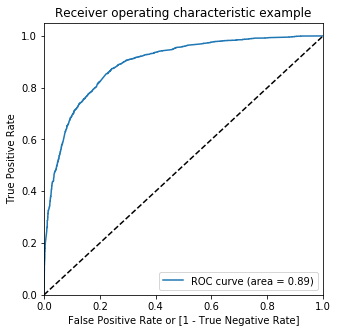

In [776]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

As the ROC Area = 0.89, we have a confident model

### Step 9: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [777]:
for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)

In [778]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df) 

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.622604     0.974453     0.405797
0.2          0.2  0.767161     0.914031     0.676662
0.3          0.3  0.801330     0.872668     0.757371
0.4          0.4  0.816636     0.769667     0.845577
0.5          0.5  0.821429     0.704380     0.893553
0.6          0.6  0.813544     0.639497     0.920790
0.7          0.7  0.789425     0.535280     0.946027
0.8          0.8  0.766543     0.436740     0.969765
0.9          0.9  0.719388     0.282644     0.988506


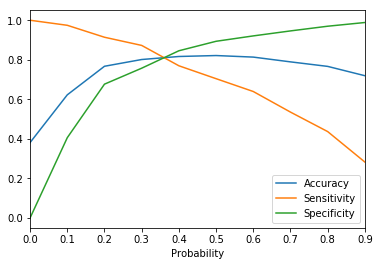

In [779]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [780]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)


In [781]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8107606679035251

In [782]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3236,  766],
       [ 458, 2008]], dtype=int64)

In [783]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [784]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8142741281427412

In [785]:
# Let us calculate specificity
TN / float(TN+FP)

0.8085957021489255

In [786]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19140429785107446


In [787]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7238644556596971


In [788]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8760151597184623


### Step 10: Making predictions on the test set

In [789]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [790]:
X_test = X_test[col]

In [791]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [792]:
y_test_pred = res.predict(X_test_sm)

In [793]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [794]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [795]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [796]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [797]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [798]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.577569
1,1,2376,0.941191
2,1,7766,0.939792
3,0,9199,0.137590
4,1,4359,0.847157


In [799]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [800]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Converted_Prob'], axis=1)

In [801]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,4269,1,0.577569
1,2376,1,0.941191
2,7766,1,0.939792
3,9199,0,0.137590
4,4359,1,0.847157


In [802]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [803]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,4269,1,0.577569,1
1,2376,1,0.941191,1
2,7766,1,0.939792,1
3,9199,0,0.137590,0
4,4359,1,0.847157,1


In [804]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8059163059163059

In [805]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1331,  346],
       [ 192,  903]], dtype=int64)

In [806]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [807]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8246575342465754

In [808]:
# Let us calculate specificity
TN / float(TN+FP)

0.7936791890280263

### Step 11: Calculating the Lead Score 

In [809]:
 y_train_pred_final.shape

(6468, 15)

In [810]:
y_pred_final.shape

(2772, 4)

In [811]:
final_data = pd.concat([y_train_pred_final,y_pred_final])

In [812]:
final_data = final_data.drop(['predicted',0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],1)
final_data['Lead_Score'] = final_data['Converted_Prob'].apply(lambda x: int(x*100))

In [813]:
final_data.sort_values(by = 'Lead_Score',ascending=False).head(3)

,Converted,Converted_Prob,Lead Number,final_predicted,Lead_Score
6054,1,0.995462,8101,1,99
2510,1,0.990872,1625,1,99
256,1,0.995462,5792,1,99


In [814]:
### Checking the Conversion Rate
converted = (sum(final_data['Converted'])/sum(final_data['final_predicted']))*100
converted

88.51603281133482

Thus by reducing the number of users the marketing team tries to contact, we can acheive better conversion rate 